# Tobit

$$y_{i}^{*}=x_{i}\beta_{0}+\epsilon_{i},\quad\epsilon_{i}|x_{i}\sim N\left(0,\sigma_{0}^{2}\right)$$

$$y_{i}=\max\left\{ x_{i}\beta+\epsilon_{i},c\right\}$$

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)
sns.set_context('notebook')

%matplotlib inline

## Generate data

In [2]:
# True parameter
theta = .5
# Sample size
n = int(1e2)
# Independent variable, N(0,1)
X = np.random.normal(0, 1, n)
# Error term, N(0,1)
e = np.random.normal(0, 1, n)

# Sort data for nice plots
X = np.sort(X)

# Unobservable dependent variable
Ys = X * theta + e

# Generate observable binary variable
Y = Ys.copy()
Y[Ys < 0] = 0.

## Plot the data and the model

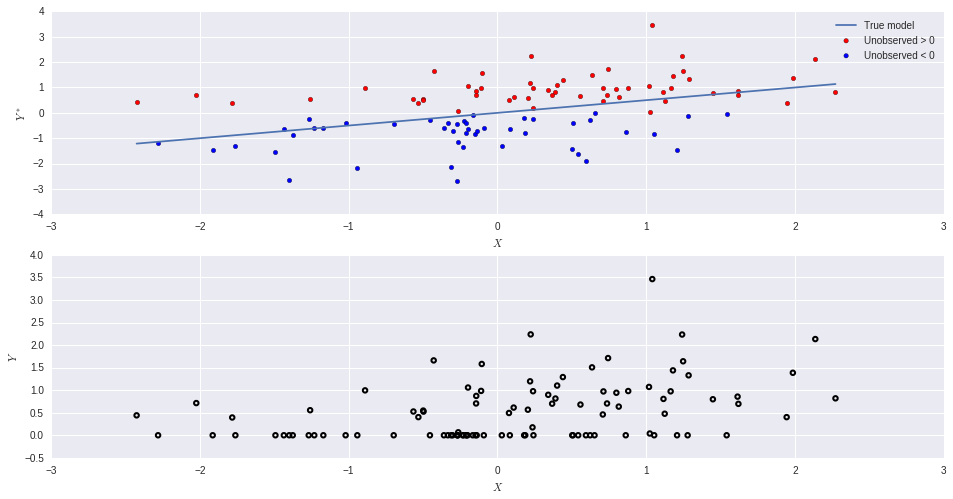

In [3]:
plt.figure(figsize=(16, 8))

# Unobservables
plt.subplot(2, 1, 1)
plt.plot(X, X * theta, label='True model')
plt.scatter(X[Ys > 0], Ys[Ys > 0], c='red', label='Unobserved > 0')
plt.scatter(X[Ys < 0], Ys[Ys < 0], c='blue', label='Unobserved < 0')
plt.ylabel(r'$Y^*$')
plt.xlabel(r'$X$')
plt.legend()

# Observables
plt.subplot(2, 1, 2)
plt.scatter(X, Y, c=[], lw=2)
plt.ylabel(r'$Y$')
plt.xlabel(r'$X$')

plt.show()

## Maximize log-likelihood

$$\log\tilde{f}\left(\left.y_{i}\right|x_{i};\delta,\gamma\right)=1\left(y_{i}>c\right)\left[-\frac{1}{2}\log\left(2\pi\right)+\log\gamma-\frac{1}{2}\left(y_{i}\gamma-x_{i}\delta\right)^{2}\right]+1\left(y_{i}=c\right)\log\Phi\left(y_{i}\gamma-x_{i}\delta\right)$$

In [4]:
import scipy.optimize as opt
from scipy.stats import norm

# Define objective function
def f(theta, X, Y):
    gamma = theta[0]
    delta = theta[1]
    Q1 = - np.mean(- .5 * (np.log(2 * np.pi) - 2 * np.log(gamma) + (Y[Y > 0] * gamma - X[Y > 0] * delta) ** 2))
    Q2 = - np.mean(np.log(1e-3 + norm.cdf(Y[Y == 0.] * gamma - X[Y == 0.] * delta)))
    Q = Q1 + Q2
    
    return Q

# Run optimization routine
theta_hat = opt.fmin_bfgs(f, [1., 1.], args = (X, Y))
# Go back to original parameters
sigma_hat = 1/ theta_hat[0]
beta_hat = theta_hat[1] / sigma_hat
print('Transformed parameters: ', theta_hat)
print('Original parameters: ', [sigma_hat, beta_hat])

Optimization terminated successfully.
         Current function value: 2.067436
         Iterations: 5
         Function evaluations: 28
         Gradient evaluations: 7
Transformed parameters:  [ 0.9933  0.4912]
Original parameters:  [1.0067497494290489, 0.48789076182440816]


## Plot objective function, true parameter, and the estimate

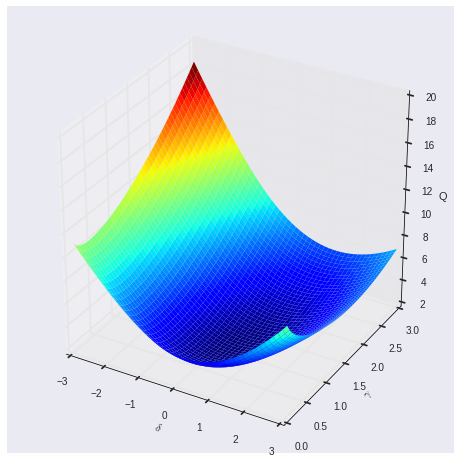

In [5]:
# 3D plotting module
from mpl_toolkits.mplot3d import Axes3D

# Number of points on the grid
pp = int(5e1)
# Generate data for objective function plot
g = np.linspace(.1, 3., pp)
d = np.linspace(-3., 3., pp)
G, D = np.meshgrid(g, d)

# Evaluate objective function at each point
Q = np.array([f([a, b], X, Y) for a, b in np.nditer([G, D])]).reshape(pp, pp)

# Plot the data
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.plot_surface(D, G, Q, rstride=1, cstride=1, cmap=plt.cm.jet,
        linewidth=0, antialiased=True)

ax.set_xlabel(r'$\delta$')
ax.set_ylabel(r'$\gamma$')
ax.set_zlabel('Q')
plt.show()